This file contains code for converting .nc files containing precipitation values collected from NASA's Giovanni tool into a csv file for the purpose of merging with the USDA's crop dataset

In [ ]:
import glob
import pandas as pd
import xarray as xr

In [ ]:
def loadFile(filename):
  ds = xr.open_mfdataset(filename) # Open file
  df = ds.to_dataframe().reset_index() # Convert to dataframe
  df = df.rename(columns={'GPM_3IMERGM_06_precipitation': 'precipitation'}) # Simplify column name
  return df

In [ ]:
cols = ['year', '04', '05', '06', '07', '08', '09'] # Independent attribute columns
precipitation_df = pd.DataFrame(columns = cols) # Create an empty dataframe

files = glob.glob("*.nc") # Load in all .nc files collected from Giovanni
files.sort() # Sort the files based on name, resulting a sort by year and then month

year = 2010 # Manually set the first year of data points

i = 0
while i < len(files):
  vals = [year] # Set the first value as the year
  for j in range(6): # Loop through next 6 files in list, corresponding to months April-September of current year value
    vals.append(loadFile(files[i])['precipitation'].mean()) # Add average of month precipitation to list
    i += 1
  year += 1

  precipitation_df.loc[len(precipitation_df)] = vals # Insert row containing year and precipitation averages into dataframe

precipitation_df['year'] = precipitation_df['year'].astype(int) # Convert year column to int values

In [ ]:
precipitation_df.head(10)

,year,04,05,06,07,08,09
0,2010,30.694435,81.588577,58.637985,78.923126,17.362423,69.998413
1,2011,45.750355,40.541813,116.750931,79.271660,32.360817,22.124327
2,2012,47.437500,47.412399,45.361950,55.098766,83.910904,28.993668
3,2013,20.637459,37.462730,63.991859,63.322220,37.813324,104.675720
4,2014,58.613281,97.672356,83.434563,52.785389,34.234802,56.856579
5,2015,89.006805,56.045376,77.334534,50.652809,13.692476,20.045979
6,2016,63.119766,117.061249,68.671516,40.537788,54.796494,30.939898
7,2017,74.414261,38.882072,36.977493,65.464905,25.178944,27.750265
8,2018,20.901785,32.782516,61.801449,91.193832,5.031616,61.841522
9,2019,55.347668,76.584427,44.642345,61.100101,39.235573,25.776859


In [ ]:
precipitation_df.to_csv('GPM_DATA.csv', index = False) # Convert dataframe to .csv file

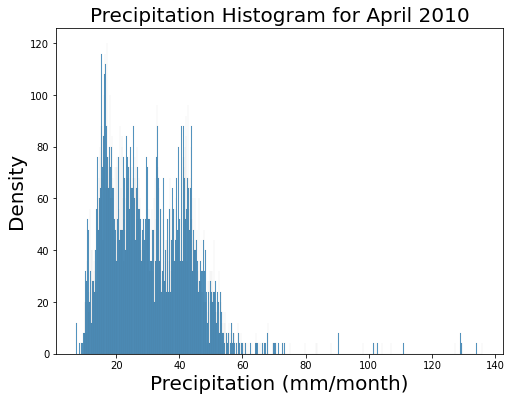

In [ ]:
# Display the distribution of precipitation values for one file
# This is only for visual purposes

import matplotlib.pyplot as plt
import seaborn as sns

df = loadFile('2010.04.nc')

X = df.drop(columns=['precipitation'])
y = df['precipitation']

plt.figure(figsize=(8,6))
s = sns.histplot(y, bins = 1000)
s.set_xlabel("Precipitation (mm/month)", fontsize = 20)
s.set_ylabel("Density", fontsize = 20)
title = plt.title("Precipitation Histogram for April 2010", fontsize = 20)